In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchsummary
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
train_transform=transforms.Compose([transforms.RandomResizedCrop(96),transforms.ToTensor(),transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])])
test_transform=transforms.Compose([transforms.Resize(96),transforms.ToTensor(),transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])])

In [ ]:
train_data=datasets.STL10(split="train",download=True,root='./data',transform=train_transform)
test_data=datasets.STL10(split="test",download=True,root='./data',transform=test_transform)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-03780341310d>", line 1, in <module>
    train_data=datasets.STL10(split="train",download=True,root='./data',transform=train_transform)
  File "/usr/local/lib/python3.7/dist-packages/torchvision/datasets/stl10.py", line 60, in __init__
    self.download()
  File "/usr/local/lib/python3.7/dist-packages/torchvision/datasets/stl10.py", line 160, in download
    download_and_extract_archive(self.url, self.root, filename=self.filename, md5=self.tgz_md5)
  File "/usr/local/lib/python3.7/dist-packages/torchvision/datasets/utils.py", line 430, in download_and_extract_archive
    download_url(url, download_root, filename, md5)
  File "/usr/local/lib/python3.7/dist-packages/torchvision/datasets/utils.py", line 131, in download_url
    url = _get_redirect_url(url, max_hops=max_redir

KeyboardInterrupt: ignored

In [ ]:
train_data=datasets.STL10(split="train",download=True,root='./data',transform=train_transform)
test_data=datasets.STL10(split="test",download=True,root='./data',transform=test_transform)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
classes=train_data.classes
print(len(classes))
print(classes)

10
['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck']


In [ ]:
print("Train data set size:",len(train_data))
print("Test data set size:",len(test_data))

Train data set size: 5000
Test data set size: 8000


In [ ]:
train_loader=DataLoader(train_data,batch_size=4,shuffle=True)
test_loader=DataLoader(test_data,batch_size=4,shuffle=False)

In [ ]:
def show_imgs(imgs,title):
  imgs=imgs.cpu()
  mean=torch.tensor([0.485,0.456,0.406]).view(1,3,1,1)
  std=torch.tensor([0.229,0.224,0.225]).view(1,3,1,1)
  imgs=imgs*std+mean
  imgs_grid=torchvision.utils.make_grid(imgs,nrow=4)
  img_np=imgs_grid.numpy()
  img_np=np.transpose(img_np,(1,2,0))
  plt.figure(figsize=(8,4))
  plt.imshow(img_np)
  plt.title(title)
  plt.show()

Training Examples


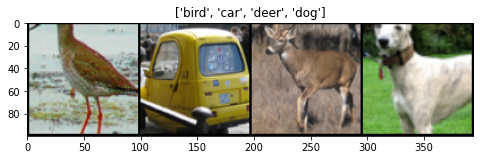

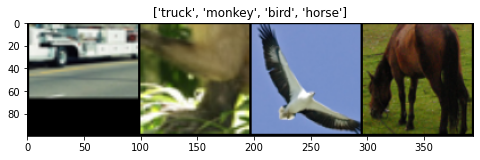

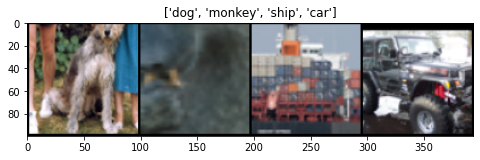

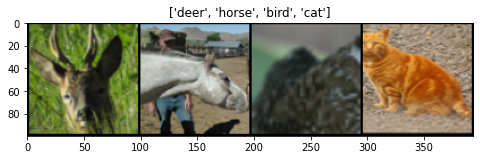

In [ ]:
print("Training Examples")
for i,batch in enumerate(train_loader):
  if(i==4):
    break
  images,labels=batch
  show_imgs(images,str([classes[i] for i in labels]))

Test Examples


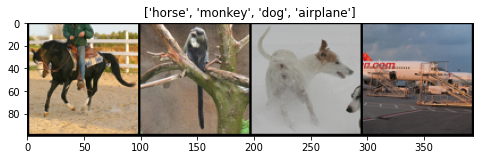

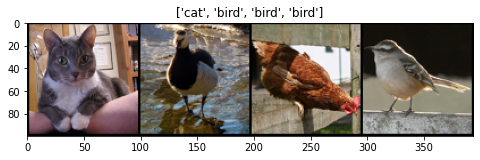

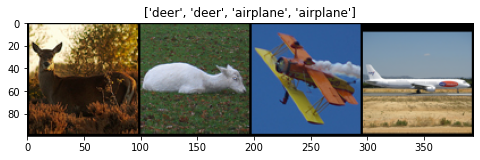

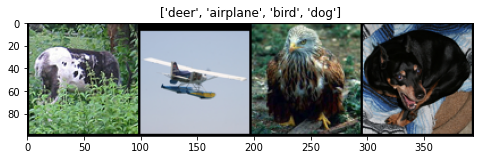

In [ ]:
print("Test Examples")
for i,batch in enumerate(test_loader):
  if(i==4):
    break
  images,labels=batch
  show_imgs(images,str([classes[i] for i in labels]))

In [ ]:
vgg=torchvision.models.vgg19(pretrained=True)
vgg

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [ ]:
torchsummary.summary(vgg.to(device),input_size=(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [ ]:
vgg.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [ ]:
in_features=vgg.classifier[6].in_features
print(in_features)
modified_classifier=list(vgg.classifier.children())[:-1]
modified_classifier.append(nn.Linear(in_features,10))
modified_classifier

4096


[Linear(in_features=25088, out_features=4096, bias=True),
 ReLU(inplace=True),
 Dropout(p=0.5, inplace=False),
 Linear(in_features=4096, out_features=4096, bias=True),
 ReLU(inplace=True),
 Dropout(p=0.5, inplace=False),
 Linear(in_features=4096, out_features=10, bias=True)]

In [ ]:
vgg.classifier=nn.Sequential(*modified_classifier)
vgg

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [ ]:
for parm in vgg.parameters():
  parm.requires_grad=False

In [ ]:
for parm in vgg.classifier[6].parameters():
  parm.requires_grad=True

In [ ]:
for parm in vgg.parameters():
  if(parm.requires_grad==True):
    print(parm.size())

torch.Size([10, 4096])
torch.Size([10])


In [ ]:
def evaluate(model,dataloader):
  total,correct=0,0
  model.eval()
  for batch in dataloader:
    images,labels=batch
    images,labels=images.to(device),labels.to(device)
    outs=model(images)
    out_labels=torch.argmax(outs,axis=1)
    total=total+labels.size(0)
    correct=correct+(labels==out_labels).sum().item()
  return 100* correct/total

In [ ]:
import copy
def train(model,modelname,loss_fn,optimizer,train_loader,test_loader,epochs):
  hist={'epoch_loss':[],'train_acc':[],'test_acc':[]}
  min_loss=10000
  for epoch in tqdm(range(1,epochs+1),total=epochs,desc='Training last layer'):
    losses=[]
    for batch in train_loader:
      images,labels=batch
      images,labels=images.to(device),labels.to(device)
      model.train()
      outs=model(images)
      loss=loss_fn(outs,labels)
      losses.append(loss.item())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      del images,labels,outs
      torch.cuda.empty_cache()
    curr_epoch_loss=np.array(losses).mean()
    hist['epoch_loss'].append(curr_epoch_loss)
    hist['train_acc'].append(evaluate(model,train_loader))
    hist['test_acc'].append(evaluate(model,test_loader))
    if(curr_epoch_loss<min_loss):
      min_loss=curr_epoch_loss
      best_model=copy.deepcopy(model.state_dict())
  fig,ax=plt.subplots(ncols=2,figsize=(12,6))
  ax[0].plot(range(1,epochs+1),hist['epoch_loss'],label='loss')
  ax[0].plot(range(1,epochs+1),np.ones(epochs)*min_loss,'r--',alpha=0.6,label='Min Loss={}'.format(min_loss))
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('Loss')
  ax[0].set_title('Epochs vs Loss')
  ax[0].grid()
  ax[0].legend()
  ax[1].plot(range(1,epochs+1),hist['train_acc'],'b--',alpha=0.8,label='Train Accuracy')
  ax[1].plot(range(1,epochs+1),hist['test_acc'],'r--',alpha=0.8,label='Test Accuracy')
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Accuracy Score')
  ax[1].set_title('Epochs vs Accuracy Score')
  ax[1].grid()
  ax[1].legend()
  plt.plot()
  torch.save(best_model,'{0}_{1:.4f}.pth'.format(modelname,min_loss))
  print("Best loss value: {}".format(min_loss))
  #files.download('{0}_{1:.4f}.pth'.format(modelname,min_loss))
  return best_model


In [ ]:
train_loader=DataLoader(train_data,batch_size=16,shuffle=True)
test_loader=DataLoader(test_data,batch_size=16,shuffle=False)

Training last layer:   0%|          | 0/25 [00:00<?, ?it/s]

Best loss value: 0.3448943700522375


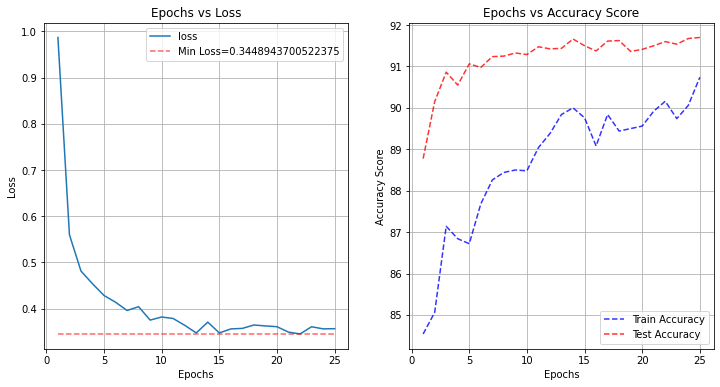

In [ ]:
vgg=vgg.to(device)
opt=torch.optim.Adam(vgg.parameters(),lr=0.0001)
loss_fn=nn.CrossEntropyLoss()
vgg_wts=train(vgg,'vgg',loss_fn,opt,train_loader,test_loader,25)